# Telecom operator client's churn rate analysis
use data *'telecom_churn.csv'*

churn = 1 -> not loyal
churn = 0 -> loyal

In [84]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 2)

In [85]:
df = pd.read_csv('telecom_churn.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Data dimensionality

In [86]:
df.shape

(3333, 20)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [88]:
#convert bool to int  
df['Churn'] = df['Churn'].astype('int')

In [89]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [90]:
#statistics of non-numerical features
df.describe(include = ['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [91]:
df['Churn'].value_counts()
# churn = 0 -> 2850 over 3333 clients are loyal

0    2850
1     483
Name: Churn, dtype: int64

In [92]:
df['Churn'].value_counts(normalize = True)
# 86% of clients are loyal; 14% not loyal

0    0.86
1    0.14
Name: Churn, dtype: float64

## Sorting

In [93]:
#Top 5 total day charge instance
df.sort_values(by = 'Total day charge', ascending = False).head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [94]:
#top 5 loyal client total day charge
df.sort_values(by = ['Churn', 'Total day charge'], ascending = [True, False]).head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Indexing and retrieving data

In [95]:
# proportion of churn users 
df['Churn'].mean() #14.5% churn rate 
                   #nearly 15% of client decided to unsuscribe their telco services

0.14491449144914492

lets dive into the features of churned client

In [97]:
#average value of numerical features of churned client
df[df['Churn'] == 1].mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_55828\2842267819.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Churn'] == 1].mean()


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [98]:
#compare to loyal client
df[df['Churn'] == 0].mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_55828\1808167978.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Churn'] == 0].mean()


Account length            100.79
Area code                 437.07
Number vmail messages       8.60
Total day minutes         175.18
Total day calls           100.28
Total day charge           29.78
Total eve minutes         199.04
Total eve calls           100.04
Total eve charge           16.92
Total night minutes       200.13
Total night calls         100.06
Total night charge          9.01
Total intl minutes         10.16
Total intl calls            4.53
Total intl charge           2.74
Customer service calls      1.45
Churn                       0.00
dtype: float64

In [99]:
#the average amount of time churned client spend on their phone during daytime
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

In [101]:
#max length of international call among churned user who do not have an international plan
df[(df['Churn'] == 1) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.3

## Grouping

In [103]:
col = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby('Churn')[col].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [104]:
df.groupby('Churn')[col].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

## Summary table

In [105]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


In [107]:
pd.crosstab(df['Churn'],df['Voice mail plan'], normalize = True)

Voice mail plan,No,Yes
Churn,,
0,0.60,0.25
1,0.12,0.02


although 85% of clients are loyal but they do not subscribe to additional services: International plan & Voice mail plan

In [109]:
df.pivot_table(
               ['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'],
               aggfunc = 'mean'
              )

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


## Transformation

In [110]:
df['total_calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']  
df
#insert by series: df.insert(loc=len(df.columns), column="Total calls", value=total_calls)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,292
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,239
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,264
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,336


In [111]:
df[df['Churn'] == 1].max()

State                        WY
Account length              225
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        48
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             168
Total eve charge          30.91
Total night minutes       354.9
Total night calls           158
Total night charge        15.97
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
total_calls                 408
dtype: object

## Seaborn

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='International plan', ylabel='count'>

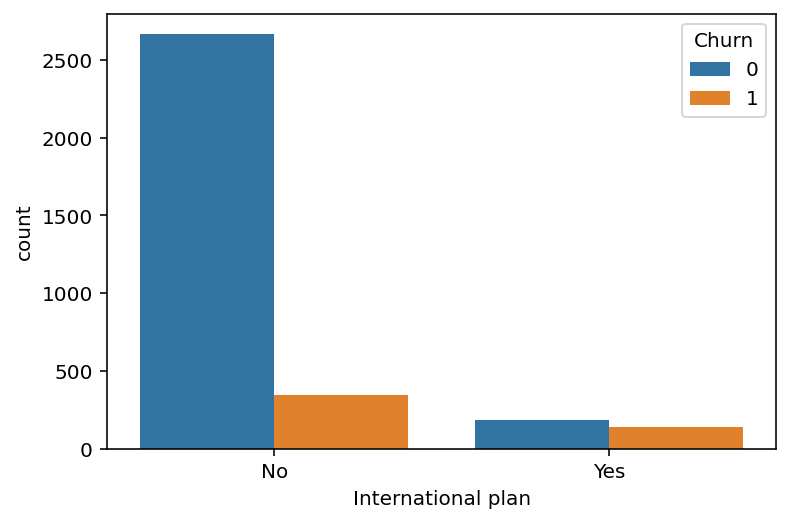

In [113]:
sns.countplot(x='International plan', hue = 'Churn', data = df)

most client stick to not use international plan 
-> international calls expenses are conflict-prone? 

In [118]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins = True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

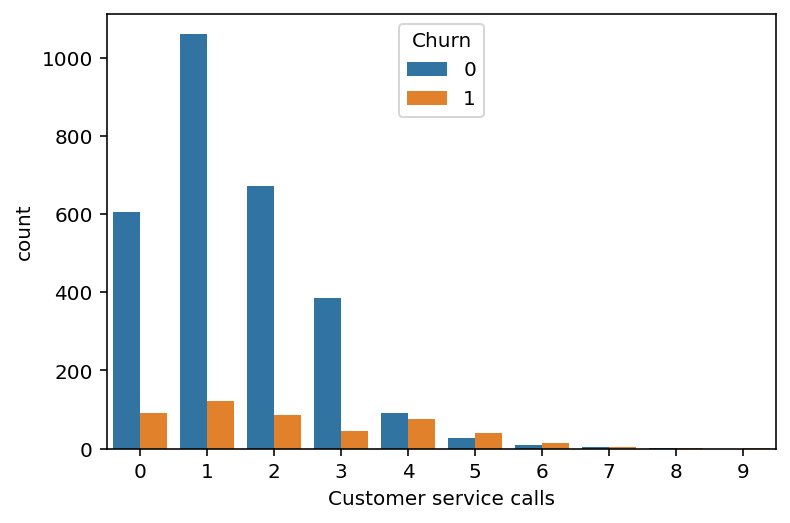

In [119]:
sns.countplot(x='Customer service calls', hue='Churn', data = df)

In [124]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")
pd.crosstab(df['Many_service_calls'], df['Churn'], margins = True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<AxesSubplot:xlabel='Many_service_calls', ylabel='count'>

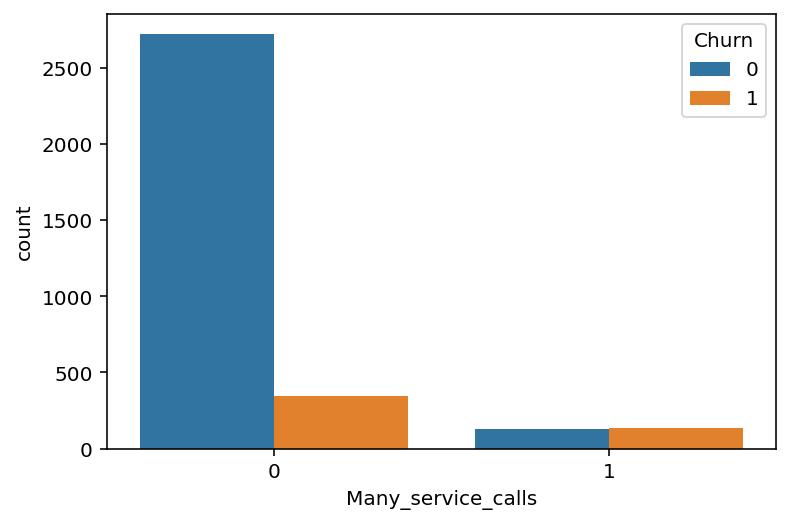

In [125]:
sns.countplot(x = 'Many_service_calls', hue = 'Churn', data = df)